In [215]:
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm

In [216]:
#Fonction :
def initialisation(n0, n1, n2):
    W1 = np.random.randn(n1, n0)
    b1 = np.random.randn(n1, 1)
    W2 = np.random.randn(n2, n1)
    b2 = np.random.randn(n2, 1)
    
    param = {
        'W1' : W1,
        'b1' : b1,
        'W2' : W2,
        'b2' : b2
    }
    return param

def forward_propagation(X, param):
    Z1 = param['W1'].dot(X) + param['b1']
    A1 = 1 / (1 + np.exp(-Z1))
    Z2 = param['W2'].dot(A1) + param['b2']
    A2 = 1 / (1 + np.exp(-Z2))
    
    activations = {
        'A1' : A1,
        'A2' : A2
    }
    return activations

def back_propagation(X, y, activations, param):
    m = y.shape[1]
    
    dZ2 = activations['A2'] - y    
    dW2 = 1 / m * dZ2.dot(activations['A1'].T)
    db2 = 1 / m * np.sum(dZ2, axis=1, keepdims=True)
    
    dZ1 = np.dot(param['W2'].T, dZ2) * activations['A1'] * (1 - activations['A1'])
    dW1 = 1 / m * dZ1.dot(X.T)
    db1 = 1 / m * np.sum(dZ1, axis=1, keepdims=True)
    
    
    gradients = {
        'dW1' : dW1,
        'db1' : db1,
        'dW2' : dW2,
        'db2' : db2
    }
    
    return gradients

def update(gradients, param, learning_rate):
    W1 = param['W1'] - learning_rate * gradients['dW1']
    b1 = param['b1'] - learning_rate * gradients['db1']
    W2 = param['W2'] - learning_rate * gradients['dW2']
    b2 = param['b2'] - learning_rate * gradients['db2']
    
    param = {
        'W1' : W1,
        'b1' : b1,
        'W2' : W2,
        'b2' : b2
    }
    
    return param

def predict(X, param):
    activations = forward_propagation(X, param)
    return activations["A2"] >= 0.5

def normalisedAndReshape(set):    
    return set.reshape(set.shape[0], -1)/set.max()

def affichage_comparaison_train_test(train, test):
    plt.figure(figsize=(16, 9))
    plt.subplot(2, 1, 1)
    plt.plot(train[0], label='train loss')
    plt.plot(test[0], label='test loss')
    plt.legend()
    plt.subplot(2, 1, 2)
    plt.plot(train[1], label='train acc')
    plt.plot(test[1], label='test acc')
    plt.legend()
    plt.show()

from sklearn.metrics import accuracy_score, log_loss
from utilities import load_data

In [217]:
#Fonction principale de train avec comparaison du test
def neural_network(X_train, y_train, n1, X_test, y_test, learning_rate, n_iter, nb_affichage = 100):
    # Initialisation des variables : --------------------------------------------------------------
    n0 = X_train.shape[0]
    n2 = y_train.shape[0]
    
    train_loss_acc = ([],[])
    test_loss_acc = ([],[])
    
    # gestion de l'affichage : --------------------------------------------------------------------
    if n_iter <= nb_affichage:
        x_sample = 1
    else:
        x_sample = int((n_iter/nb_affichage))
    
    
    # Initialisation du trainning : ---------------------------------------------------------------
    
    param = initialisation(n0, n1, n2) # initialisation des poids du modèle et du biais

    
    # Aprendtissage : -----------------------------------------------------------------------------
    for i in tqdm(range(n_iter)):
        activations = forward_propagation(X_train, param)
        
        # Calcul gradients et Update des poids :
        gradients = back_propagation(X_train, y_train, activations, param)
        param = update(gradients, param, learning_rate)
        
        if i % x_sample == 0 :
            # Train
            y_pred = predict(X_train, param)
            train_loss_acc[0].append(log_loss(y_train, activations['A2']))
            train_loss_acc[1].append(accuracy_score(y_train.flatten(), y_pred.flatten()))

            # Test
            activations_test = forward_propagation(X_test, param)
            y_pred_test = predict(X_test, param)
            test_loss_acc[0].append(log_loss(y_test, activations_test['A2']))
            test_loss_acc[1].append(accuracy_score(y_test.flatten(), y_pred_test.flatten()))
        
        

    # Affichage des résultats : -------------------------------------------------------------------
    affichage_comparaison_train_test(train_loss_acc, test_loss_acc)
    
    return param

In [218]:
#Récupération des données :
X_train, y_train, X_test, y_test = load_data()

# Normalisation et flatten des données :
normFlat_X_train = normalisedAndReshape(X_train)
normFlat_X_test = normalisedAndReshape(X_test)

normFlat_X_train = normFlat_X_train.T
normFlat_X_test = normFlat_X_test.T
y_train = y_train.T
y_test = y_test.T

print("\n", normFlat_X_train.shape, y_train.shape, normFlat_X_test.shape, y_test.shape, "\n")


 (4096, 1000) (1, 1000) (4096, 200) (1, 200) 



  0%|          | 0/4000 [00:00<?, ?it/s]

c:\Users\Alloy\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:2956: UserWarning: The y_pred values do not sum to one. Make sure to pass probabilities.
  warnings.warn(
c:\Users\Alloy\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:2956: UserWarning: The y_pred values do not sum to one. Make sure to pass probabilities.
  warnings.warn(
  0%|          | 3/4000 [00:00<02:38, 25.29it/s]c:\Users\Alloy\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:2956: UserWarning: The y_pred values do not sum to one. Make sure to pass probabilities.
  warnings.warn(
c:\Users\Alloy\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:2956: UserWarning: The y_pred values do not sum to one. Make sure to pass probabilities.
  warnings.warn(
  0%|          | 7/4000 [00:00<02:17, 29.10it/s]c:\Users\Alloy\AppData\Local\Programs\Python\Pyt

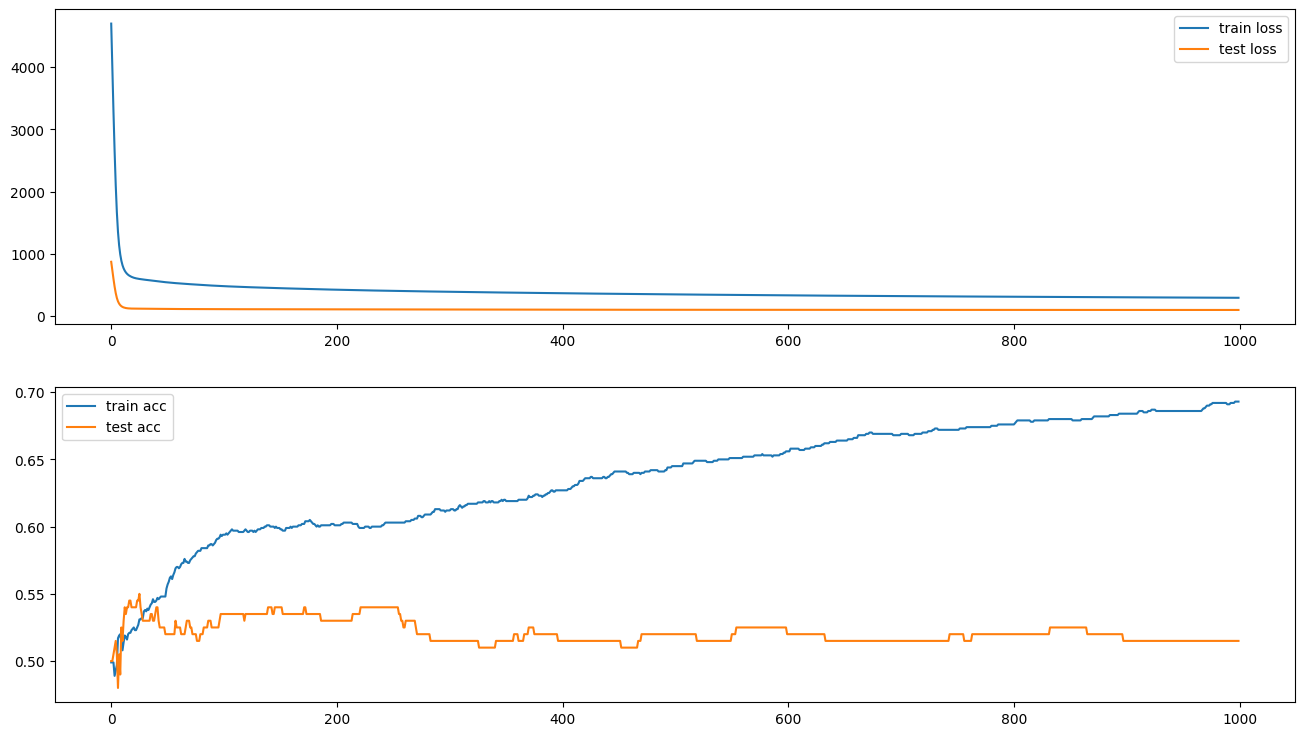

In [220]:
# lancement de l'apprentissage
param = neural_network(normFlat_X_train, y_train, 128, normFlat_X_test, y_test, learning_rate = 0.01, n_iter=4000, nb_affichage=1000)